# Calling the cleaned dataframe from the respective notebook

In [1]:
import pandas as pd

travel_trip_complete_df = pd.read_parquet("../data/clean/travel_trip_complete.parquet")
travel_trip_complete_christos_df = travel_trip_complete_df.copy()
travel_trip_complete_christos_df

,destination,trip_id,destination_country,destination_city,start_date,end_date,duration_days,traveler_name,traveler_age,traveler_gender,...,accommodation_cost,transportation_type,transportation_cost,end_year,end_month,start_year,start_month,start_month_name,end_month_name,traveler_nationality_clean
0,"London, UK",1,UK,London,2023-05-01,2023-05-01,7.0,john smith,35.0,Male,...,1200,Flight,600.0,2023,5,2023,5,May,May,United States
1,"Phuket, Thailand",2,Thailand,Phuket,2023-06-01,2023-06-01,5.0,jane doe,28.0,Female,...,800,Flight,500.0,2023,6,2023,6,June,June,Canada
2,"Bali, Indonesia",3,Indonesia,Bali,2023-07-01,2023-07-01,7.0,david lee,45.0,Male,...,1000,Flight,700.0,2023,7,2023,7,July,July,South Korea
3,"New York, USA",4,USA,New York,2023-08-01,2023-08-01,14.0,sarah johnson,29.0,Female,...,2000,Flight,1000.0,2023,8,2023,8,August,August,United Kingdom
4,"Tokyo, Japan",5,Japan,Tokyo,2023-09-01,2023-09-01,7.0,kim nguyen,26.0,Female,...,700,Train,200.0,2023,9,2023,9,September,September,Vietnamese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,"Rio de Janeiro, Brazil",135,Brazil,Rio de Janeiro,2023-08-01,2023-08-01,9.0,jose perez,37.0,Male,...,2500,Private Car,2000.0,2023,8,2023,8,August,August,Brazil
133,"Vancouver, Canada",136,Canada,Vancouver,2023-08-01,2023-08-01,6.0,emma wilson,29.0,Female,...,5000,Airplane,3000.0,2023,8,2023,8,August,August,Canada
134,"Bangkok, Thailand",137,Thailand,Bangkok,2023-09-01,2023-09-01,7.0,ryan chen,34.0,Male,...,2000,Train,1000.0,2023,9,2023,9,September,September,China
135,"Barcelona, Spain",138,Spain,Barcelona,2023-09-01,2023-09-01,7.0,sofia rodriguez,25.0,Female,...,6000,Airplane,2500.0,2023,9,2023,9,September,September,Spain


# Adding continent information  to my existing table, to check whether a trip is intercontinental vs intra-continental

In [2]:
!pip install pycountry-convert

In [3]:
import pycountry
import pycountry_convert as pc
import pandas as pd


In [4]:
import pandas as pd
import pycountry
import pycountry_convert as pc

def country_to_alpha2(country_name: str):
    if pd.isna(country_name):
        return None
    try:
        return pycountry.countries.lookup(country_name).alpha_2
    except LookupError:
        return None

def alpha2_to_continent(alpha2: str):
    if alpha2 is None:
        return None
    try:
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except KeyError:
        return None

def country_to_continent(country_name: str):
    alpha2 = country_to_alpha2(country_name)
    return alpha2_to_continent(alpha2)


In [5]:
travel_trip_complete_christos_df["traveler_nationality_continent"] = travel_trip_complete_christos_df["traveler_nationality_clean"].apply(country_to_continent)
travel_trip_complete_christos_df["destination_continent"] = travel_trip_complete_christos_df["destination_country"].apply(country_to_continent)

travel_trip_complete_christos_df["is_intercontinental_trip"] = (
    travel_trip_complete_christos_df["traveler_nationality_continent"] != travel_trip_complete_christos_df["destination_continent"]
)


In [6]:
travel_trip_complete_christos_df.tail(5)

,destination,trip_id,destination_country,destination_city,start_date,end_date,duration_days,traveler_name,traveler_age,traveler_gender,...,end_year,end_month,start_year,start_month,start_month_name,end_month_name,traveler_nationality_clean,traveler_nationality_continent,destination_continent,is_intercontinental_trip
132,"Rio de Janeiro, Brazil",135,Brazil,Rio de Janeiro,2023-08-01,2023-08-01,9.0,jose perez,37.0,Male,...,2023,8,2023,8,August,August,Brazil,South America,South America,False
133,"Vancouver, Canada",136,Canada,Vancouver,2023-08-01,2023-08-01,6.0,emma wilson,29.0,Female,...,2023,8,2023,8,August,August,Canada,North America,North America,False
134,"Bangkok, Thailand",137,Thailand,Bangkok,2023-09-01,2023-09-01,7.0,ryan chen,34.0,Male,...,2023,9,2023,9,September,September,China,Asia,Asia,False
135,"Barcelona, Spain",138,Spain,Barcelona,2023-09-01,2023-09-01,7.0,sofia rodriguez,25.0,Female,...,2023,9,2023,9,September,September,Spain,Europe,Europe,False
136,"Auckland, New Zealand",139,New Zealand,Auckland,2023-10-01,2023-10-01,7.0,william brown,39.0,Male,...,2023,10,2023,10,October,October,New Zealander,None,Oceania,True


In [7]:
travel_trip_complete_christos_df.destination_country.value_counts().sum()

np.int64(71)

In [8]:
# we need to fill the NaN values in the destination_country column
df = travel_trip_complete_christos_df

# use only rows where country is known
city_country_map = (
    df.dropna(subset=["destination_country"])
      .groupby("destination_city")["destination_country"]
      .agg(lambda s: s.mode().iloc[0])  # most frequent country per city
      .to_dict()
)

len(city_country_map)  # just to inspect how many cities you mapped


25

In [9]:
mask_missing_country = df["destination_country"].isna()

df.loc[mask_missing_country, "destination_country"] = (
    df.loc[mask_missing_country, "destination_city"]
      .map(city_country_map)
)


In [10]:
df["destination_continent"] = df["destination_country"].apply(country_to_continent)

df["destination_continent"].isna().sum()


np.int64(26)

In [11]:
df.loc[df["destination_continent"].isna(), ["destination_city", "destination_country"]].value_counts()


destination_city  destination_country
London            UK                     7
Phuket            Thai                   2
Bangkok           Thai                   1
Honolulu          Hawaii                 1
Edinburgh         Scotland               1
Name: count, dtype: int64

In [12]:
df = travel_trip_complete_christos_df

# manual mapping for the remaining weird country labels
manual_country_fix_2 = {
    "UK": "United Kingdom",
    "Thai": "Thailand",
    "Hawaii": "United States",
    "Scotland": "United Kingdom",
}

# only touch the rows that still have no continent
mask_missing_continent = df["destination_continent"].isna()

df.loc[mask_missing_continent, "destination_country"] = (
    df.loc[mask_missing_continent, "destination_country"]
      .replace(manual_country_fix_2)
)

# recompute continent
df["destination_continent"] = df["destination_country"].apply(country_to_continent)

# check remaining NaNs
df["destination_continent"].isna().sum()


np.int64(14)

In [13]:
# how many missing in destination_country
df["destination_country"].isna().sum()


np.int64(14)

In [14]:
df.loc[df["destination_country"].isna(), "destination_city"].value_counts()


destination_city
Hawaii        1
Japan         1
Thailand      1
France        1
Australia     1
Brazil        1
Greece        1
Egypt         1
Mexico        1
Italy         1
Spain         1
Canada        1
Santorini     1
Phnom Penh    1
Name: count, dtype: int64

In [15]:
manual_city_to_country_fix = {
    "Hawaii": "United States",
    "Japan": "Japan",
    "Thailand": "Thailand",
    "France": "France",
    "Australia": "Australia",
    "Brazil": "Brazil",
    "Greece": "Greece",
    "Egypt": "Egypt",
    "Mexico": "Mexico",
    "Italy": "Italy",
    "Spain": "Spain",
    "Canada": "Canada",
    "Santorini": "Greece",     # island in Greece
    "Phnom Penh": "Cambodia",  # capital of Cambodia
}

mask = df["destination_country"].isna()
df.loc[mask, "destination_country"] = (
    df.loc[mask, "destination_city"].map(manual_city_to_country_fix)
)

df["destination_continent"] = df["destination_country"].apply(country_to_continent)


In [16]:
df["destination_country"].isna().sum()

np.int64(0)

In [17]:
df = travel_trip_complete_christos_df  # if not already

# recompute destination_continent from the now-clean destination_country
df["destination_continent"] = df["destination_country"].apply(country_to_continent)

# quick sanity check
print(df["destination_continent"].isna().sum())
print(df["destination_continent"].value_counts())


0
destination_continent
Europe           47
Asia             46
North America    21
Oceania          14
South America     6
Africa            3
Name: count, dtype: int64


In [20]:
# now we do the same with traveler_nationality_continent

In [21]:
missing_nat = (
    travel_trip_complete_christos_df
    .loc[travel_trip_complete_christos_df["traveler_nationality_continent"].isna(), "traveler_nationality"]
    .dropna()
    .value_counts()
)
missing_nat


traveler_nationality
Australian       8
Indian           4
Vietnamese       3
Dutch            2
Mexican          2
South African    2
Moroccan         1
French           1
Indonesian       1
New Zealander    1
Name: count, dtype: int64

In [22]:
manual_nat_fix = {
    "Australian": "Australia",
    "Indian": "India",
    "Vietnamese": "Vietnam",
    "Dutch": "Netherlands",
    "Mexican": "Mexico",
    "South African": "South Africa",
    "Moroccan": "Morocco",
    "French": "France",
    "Indonesian": "Indonesia",
    "New Zealander": "New Zealand",
}


In [23]:
df = travel_trip_complete_christos_df  # just shorter name

# clean nationality
df["traveler_nationality_clean"] = (
    df["traveler_nationality"]
    .astype("string")
    .str.strip()
    .replace(manual_nat_fix)
)

# recompute continents ONLY from the cleaned text
df["traveler_nationality_continent"] = df["traveler_nationality_clean"].apply(country_to_continent)


In [24]:
print(df["traveler_nationality_continent"].isna().sum())
print(df["traveler_nationality_continent"].value_counts())


91
traveler_nationality_continent
Asia             19
Oceania           9
Europe            8
North America     6
Africa            3
South America     1
Name: count, dtype: int64


In [25]:
more_nat_fix = {
    "American": "United States",
    "Korean": "South Korea",       # ambiguous, but common usage
    "British": "United Kingdom",
    "Canadian": "Canada",
    "Spanish": "Spain",
    "Chinese": "China",
    "Brazilian": "Brazil",
    "Italian": "Italy",
    "South Korean": "South Korea",
    "Emirati": "United Arab Emirates",
    "Japanese": "Japan",
    "Scottish": "United Kingdom",
    "German": "Germany",
    "Taiwanese": "Taiwan",
    "UK": "United Kingdom",
}


In [26]:
manual_nat_fix.update(more_nat_fix)

df["traveler_nationality_clean"] = (
    df["traveler_nationality"]
    .astype("string")
    .str.strip()
    .replace(manual_nat_fix)
)

df["traveler_nationality_continent"] = (
    df["traveler_nationality_clean"].apply(country_to_continent)
)


In [27]:
df["traveler_nationality_continent"].isna().sum()


np.int64(0)

In [28]:
df["destination_continent"].value_counts().sum()

np.int64(137)

In [29]:
df["is_intercontinental_trip"] = (
    df["traveler_nationality_continent"] != df["destination_continent"]
)

df["is_intercontinental_trip"].value_counts()


is_intercontinental_trip
False    81
True     56
Name: count, dtype: int64

In [30]:
travel_trip_complete_christos_df = df
travel_trip_complete_christos_df.head()


,destination,trip_id,destination_country,destination_city,start_date,end_date,duration_days,traveler_name,traveler_age,traveler_gender,...,end_year,end_month,start_year,start_month,start_month_name,end_month_name,traveler_nationality_clean,traveler_nationality_continent,destination_continent,is_intercontinental_trip
0,"London, UK",1,United Kingdom,London,2023-05-01,2023-05-01,7.0,john smith,35.0,Male,...,2023,5,2023,5,May,May,United States,North America,Europe,True
1,"Phuket, Thailand",2,Thailand,Phuket,2023-06-01,2023-06-01,5.0,jane doe,28.0,Female,...,2023,6,2023,6,June,June,Canada,North America,Asia,True
2,"Bali, Indonesia",3,Indonesia,Bali,2023-07-01,2023-07-01,7.0,david lee,45.0,Male,...,2023,7,2023,7,July,July,South Korea,Asia,Asia,False
3,"New York, USA",4,USA,New York,2023-08-01,2023-08-01,14.0,sarah johnson,29.0,Female,...,2023,8,2023,8,August,August,United Kingdom,Europe,North America,True
4,"Tokyo, Japan",5,Japan,Tokyo,2023-09-01,2023-09-01,7.0,kim nguyen,26.0,Female,...,2023,9,2023,9,September,September,Vietnam,Asia,Asia,False


# Creating traveler_age clusters

In [34]:
import pandas as pd

age_bins = [0, 26, 34, 41, 51, 61, 120]
age_labels = [
    "18-25 Students-Early Professionals",   # [0,26)  -> effectively 18–25 in your data
    "26-33 Young Professionals",            # [26,34)
    "34-40 Young Parents",                  # [34,41)
    "41-50 Money & Energy Group",           # [41,51)
    "51-60 Rich but Tired",                 # [51,61)
    "61+ Retired-Elderly"                   # [61,120)
]

travel_trip_complete_christos_df["traveler_age_segment"] = pd.cut(
    travel_trip_complete_christos_df["traveler_age"],
    bins=age_bins,
    labels=age_labels,
    right=False
)

travel_trip_complete_christos_df["traveler_age_segment"].value_counts()

traveler_age_segment
26-33 Young Professionals             72
34-40 Young Parents                   25
41-50 Money & Energy Group            25
18-25 Students-Early Professionals    13
51-60 Rich but Tired                   2
61+ Retired-Elderly                    0
Name: count, dtype: int64

In [74]:
travel_trip_complete_christos_df["traveler_age_segment"].isna().sum()

np.int64(0)

In [79]:
df = travel_trip_complete_christos_df

print(df["destination_continent"].value_counts())

df[df["destination_continent"] == "Africa"][
    ["destination_city", "duration_days", "traveler_age", "traveler_age_segment"]
]


destination_continent
Europe           47
Asia             46
North America    21
Oceania          14
South America     6
Africa            3
Name: count, dtype: int64


,destination_city,duration_days,traveler_age,traveler_age_segment
14,Marrakech,7.0,26.0,26-33 Young Professionals
33,Egypt,7.0,37.0,34-40 Young Parents
128,Cape Town,9.0,45.0,41-50 Money & Energy Group


In [68]:
# exporting the enhanced table
import os
os.makedirs("../data/clean", exist_ok=True)

# 1) Human / sharing version
travel_trip_complete_christos_df.to_csv("../data/clean/travel_trip_enhanced.csv", index=False)

# 2) Analysis version (keeps dtypes)
travel_trip_complete_christos_df.to_parquet("../data/clean/travel_trip_enhanced.parquet", index=False)

# Setting up some default colouring and ordering functions for my plots later

In [84]:
# brand colours
brand_palette = ["#b22d3e", "#026453", "#ddac34", "#1480d8"]

sns.set_theme(style="whitegrid")  # or other style
sns.set_palette(brand_palette)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=brand_palette)


In [89]:
import pandas as pd
from pandas.api.types import CategoricalDtype

age_order = [
    "18-25 Students-Early Professionals",
    "26-33 Young Professionals",
    "34-40 Young Parents",
    "41-50 Money & Energy Group",
    "51-60 Rich but Tired",
    "61+ Retired-Elderly",
]

age_cat = CategoricalDtype(categories=age_order, ordered=True)

travel_trip_complete_christos_df["traveler_age_segment"] = (
    travel_trip_complete_christos_df["traveler_age_segment"]
    .astype(age_cat)
)


# Hypothesis testing

### Hypothesis #1: Seasonality patterns vary between continents Europe and Asia

To do that we need to use the series:
- start_month_name
- destination_continent

What we are going to look is whether different continents follow a different "demand curve" across the 12 months of the year. Also, we are going to examine monthly standard deviation and autocorrelation.

Interpretation: if confirmed, campaigns might be scheduled per continet.
 

In [9]:
# we need to a pivot table, with index by destination_continent, columns the months fo the year, and values the count() of the trips' month

In [31]:
hypothesis_1_group_df = travel_trip_complete_christos_df.groupby(["destination_continent", "start_month_name"])["start_month_name"].count()
hypothesis_1_group__filtered_df = hypothesis_1_group_df.loc[["Europe", "Asia"]]
hypothesis_1_group__filtered_df

destination_continent  start_month_name
Europe                 April                2
                       August               4
                       December             2
                       February             4
                       July                 7
                       June                 7
                       March                5
                       May                  6
                       November             2
                       October              4
                       September            4
Asia                   April                1
                       August               5
                       December             1
                       February             5
                       January              5
                       July                 4
                       June                 2
                       March                1
                       May                  7
                       November         

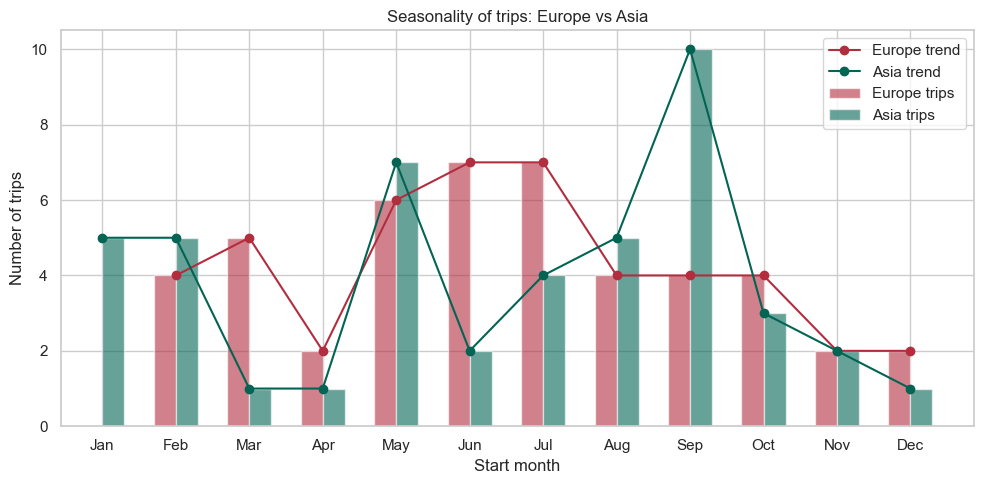

In [85]:
import matplotlib.pyplot as plt
import calendar

# aggregate only Europe & Asia, by continent + numeric month
hyp1 = (
    travel_trip_complete_christos_df
    .query("destination_continent in ['Europe', 'Asia']")
    .groupby(["destination_continent", "start_month"])
    .size()
    .reset_index(name="trip_count")
)

fig, ax = plt.subplots(figsize=(10, 5))

for continent in ["Europe", "Asia"]:
    tmp = hyp1[hyp1["destination_continent"] == continent].sort_values("start_month")

    # bars
    ax.bar(
        tmp["start_month"] + (0.15 if continent == "Asia" else -0.15),  # small shift
        tmp["trip_count"],
        width=0.3,
        label=f"{continent} trips",
        alpha=0.6,
    )

    # line on top of bars (seasonality curve)
    ax.plot(
        tmp["start_month"],
        tmp["trip_count"],
        marker="o",
        linestyle="-",
        label=f"{continent} trend",
    )

ax.set_xticks(range(1, 13))
ax.set_xticklabels(calendar.month_abbr[1:13])
ax.set_xlabel("Start month")
ax.set_ylabel("Number of trips")
ax.set_title("Seasonality of trips: Europe vs Asia")
ax.legend()
plt.tight_layout()


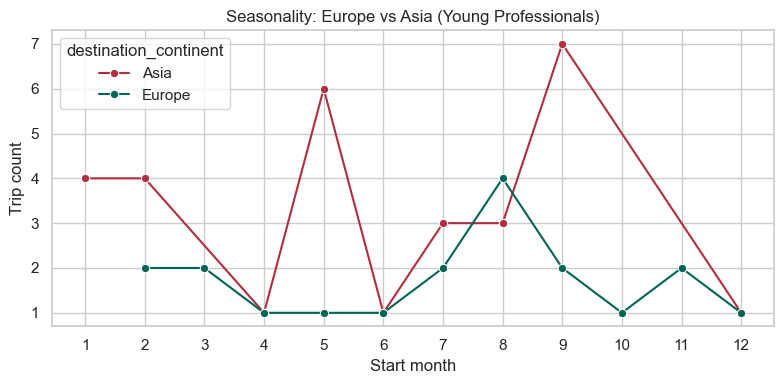

In [87]:
# now I want now to see how seasonality differs in Europe and Asia, only for traveler_age_segment "Young professionals" which as we see later, is the segment that travel the most in these two continets.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = travel_trip_complete_christos_df

# keep only this age group
df_sub = df[df["traveler_age_segment"] == "26-33 Young Professionals"]

# focus on Europe and Asia
df_sub = df_sub[df_sub["destination_continent"].isin(["Europe","Asia"])]

# monthly trip counts
monthly = (
    df_sub.groupby(["destination_continent","start_month"])
          .size()
          .reset_index(name="trip_count")
          .sort_values(["destination_continent","start_month"])
)

# brand palette
brand_palette = ["#b22d3e","#026453","#ddac34","#1480d8"]
sns.set_theme(style="whitegrid")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=brand_palette)

plt.figure(figsize=(8,4))
sns.lineplot(
    data=monthly,
    x="start_month",
    y="trip_count",
    hue="destination_continent",
    marker="o"
)

plt.xlabel("Start month")
plt.ylabel("Trip count")
plt.title("Seasonality: Europe vs Asia (Young Professionals)")
plt.xticks(range(1,13))
plt.tight_layout()



### Hypothesis #2: Different traveler demographics (age, nationality) show different destination and duration preferences.

To do that we need to use series:
- traveler_age_segment
- traveler_nationality_continent
- is_intercontinental_trip
- duration_days

What we are looking for, is if there are patterns that shows us that specific demographics, have specific destination and duration preferences, and whether duration correlates with destination as well. For example, do young travelers from Europe choose more exotic destinations over older travelers from the US?

Test: group by demographic variables and compare distributions using non-parametric statistics.

Interpretation: segmentation could justify differentiated offers.


In [36]:
travel_trip_complete_christos_df[
    ["destination_continent",
     "traveler_age_segment",
     "traveler_nationality_continent",
     "duration_days",
     "is_intercontinental_trip"]
].head()


,destination_continent,traveler_age_segment,traveler_nationality_continent,duration_days,is_intercontinental_trip
0,Europe,34-40 Young Parents,North America,7.0,True
1,Asia,26-33 Young Professionals,North America,5.0,True
2,Asia,41-50 Money & Energy Group,Asia,7.0,False
3,North America,26-33 Young Professionals,Europe,14.0,True
4,Asia,26-33 Young Professionals,Asia,7.0,False


In [37]:
travel_trip_complete_christos_df["duration_days"].describe()
travel_trip_complete_christos_df["is_intercontinental_trip"].value_counts(dropna=False)


is_intercontinental_trip
False    81
True     56
Name: count, dtype: int64

In [41]:
travel_trip_complete_christos_df.dtypes

destination                               object
trip_id                                    int64
destination_country                       object
destination_city                          object
start_date                        datetime64[ns]
end_date                          datetime64[ns]
duration_days                            float64
traveler_name                             object
traveler_age                             float64
traveler_gender                           object
traveler_nationality                      object
accommodation_type                        object
accommodation_cost                         int64
transportation_type                       object
transportation_cost                      float64
end_year                                   Int64
end_month                                  Int64
start_year                                 Int64
start_month                                Int64
start_month_name                          object
end_month_name      

In [42]:
df = travel_trip_complete_christos_df  # shorthand

# duration should be numeric
df["duration_days"] = pd.to_numeric(df["duration_days"], errors="coerce")

# intercontinental should be numeric (0/1) so mean works
df["is_intercontinental_trip"] = df["is_intercontinental_trip"].astype(float)

print(df["duration_days"].describe())
print(df["is_intercontinental_trip"].value_counts(dropna=False))


count    137.000000
mean       7.605839
std        1.601276
min        5.000000
25%        7.000000
50%        7.000000
75%        8.000000
max       14.000000
Name: duration_days, dtype: float64
is_intercontinental_trip
0.0    81
1.0    56
Name: count, dtype: int64


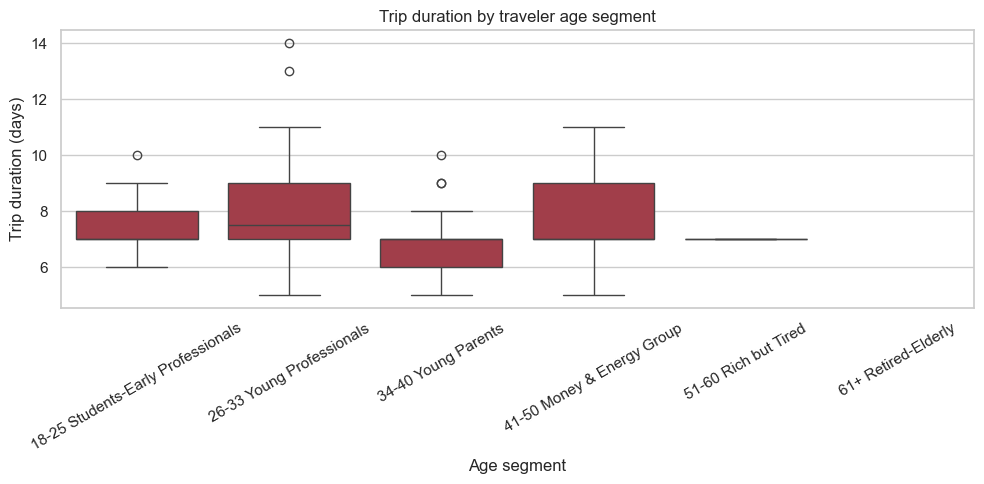

In [90]:
# 1. Duration by age segment
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(
    data=travel_trip_complete_christos_df,
    x="traveler_age_segment",
    y="duration_days"
)

plt.xlabel("Age segment")
plt.ylabel("Trip duration (days)")
plt.title("Trip duration by traveler age segment")
plt.xticks(rotation=30)
plt.tight_layout()


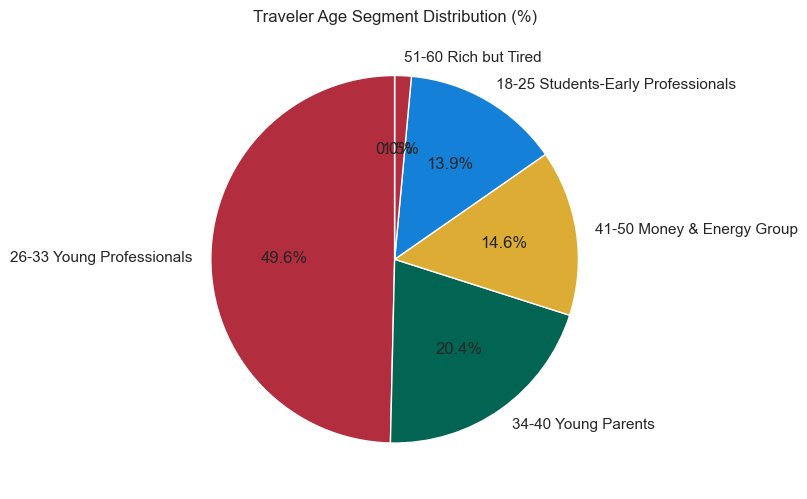

In [134]:
import matplotlib.pyplot as plt

# value counts in percentages
age_counts_pct = travel_trip_complete_christos_df["traveler_age_segment"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
age_counts_pct.plot(
    kind="pie",
    autopct="%.1f%%",
    startangle=90,
    ylabel=""  # remove default y-label
)

plt.title("Traveler Age Segment Distribution (%)")
plt.tight_layout()
plt.show()


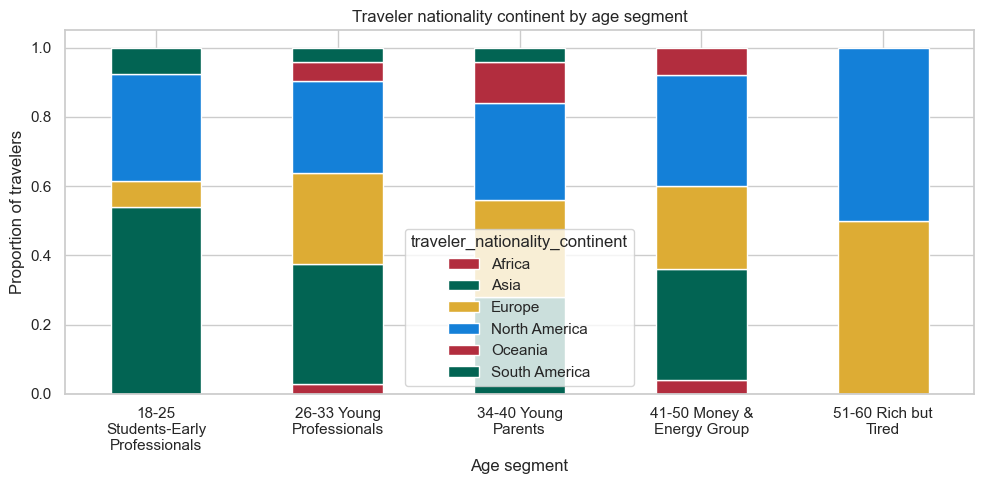

In [106]:
# 2. traveler_nationality_continent per age segment
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

df = travel_trip_complete_christos_df

ct = pd.crosstab(
    df["traveler_age_segment"],
    df["traveler_nationality_continent"]
)

ct_prop = ct.div(ct.sum(axis=1), axis=0)

ax = ct_prop.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5),
    color=["#b22d3e","#026453","#ddac34","#1480d8"]
)

# wrap x-axis labels
wrapped = [
    "\n".join(textwrap.wrap(str(lbl), width=14))
    for lbl in ct_prop.index
]
ax.set_xticklabels(wrapped, rotation=0, ha="center")

plt.xlabel("Age segment")
plt.ylabel("Proportion of travelers")
plt.title("Traveler nationality continent by age segment")
plt.tight_layout()




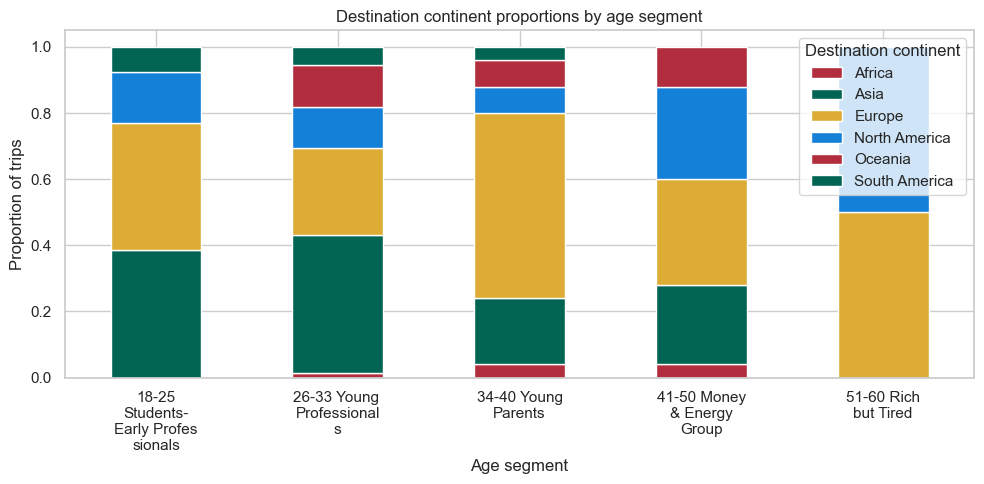

In [101]:
# 2. Destination continent by age
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

ct = pd.crosstab(
    travel_trip_complete_christos_df["traveler_age_segment"],
    travel_trip_complete_christos_df["destination_continent"]
)

ct_prop = ct.div(ct.sum(axis=1), axis=0)

ax = ct_prop.plot(kind="bar", stacked=True, figsize=(10,5))

# wrap x labels onto multiple lines
wrapped_labels = [
    "\n".join(textwrap.wrap(str(lbl), width=12))  # adjust width as needed
    for lbl in ct_prop.index
]
ax.set_xticklabels(wrapped_labels, rotation=0, ha="center")

plt.xlabel("Age segment")
plt.ylabel("Proportion of trips")
plt.title("Destination continent proportions by age segment")
plt.legend(title="Destination continent")
plt.tight_layout()



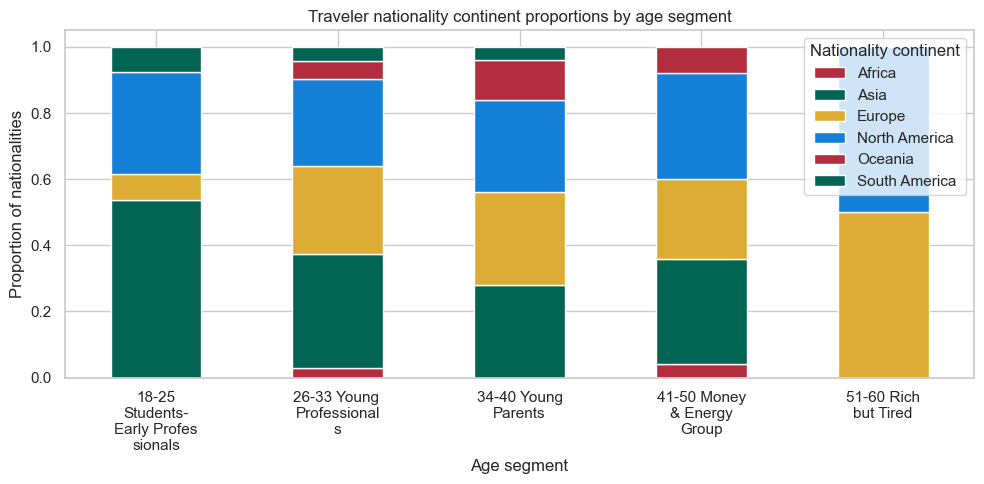

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

df = travel_trip_complete_christos_df

# rows = age segments, columns = nationality continents
ct_nat = pd.crosstab(
    df["traveler_age_segment"],
    df["traveler_nationality_continent"]
)

# row-wise proportions (per age segment)
ct_nat_prop = ct_nat.div(ct_nat.sum(axis=1), axis=0)

ax = ct_nat_prop.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5),
    color=["#b22d3e", "#026453", "#ddac34", "#1480d8"]  # brand colors
)

# wrap x labels to avoid overlap
wrapped_labels = [
    "\n".join(textwrap.wrap(str(lbl), width=12))
    for lbl in ct_nat_prop.index
]
ax.set_xticklabels(wrapped_labels, rotation=0, ha="center")

plt.xlabel("Age segment")
plt.ylabel("Proportion of nationalities")
plt.title("Traveler nationality continent proportions by age segment")
plt.legend(title="Nationality continent")
plt.tight_layout()


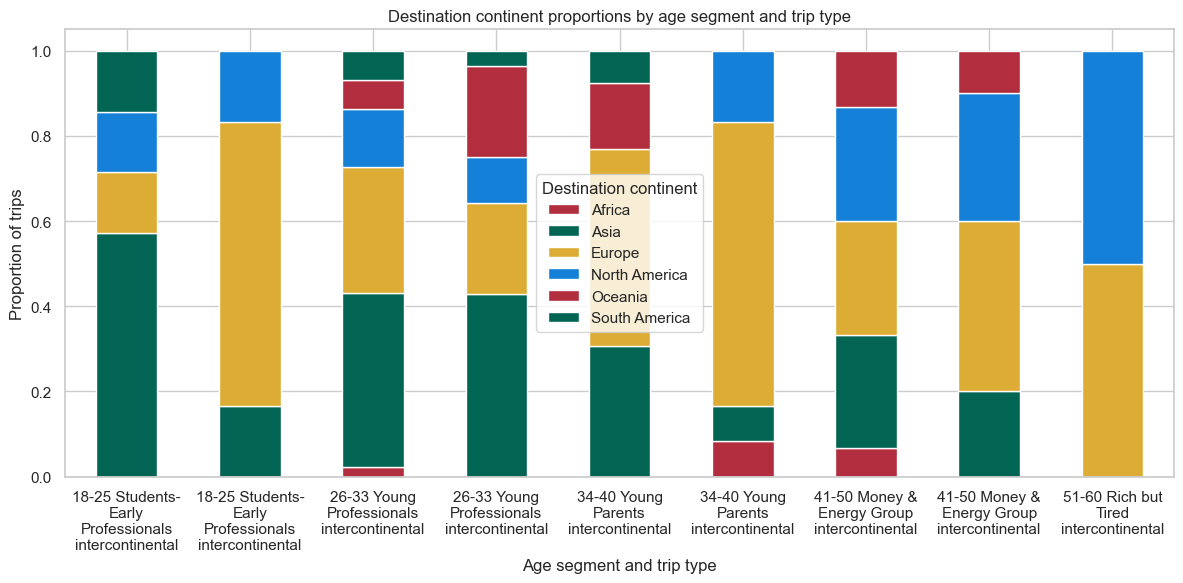

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

df = travel_trip_complete_christos_df

# 1. Build contingency: rows = (age_segment, inter/intra), columns = destination_continent
ct = pd.crosstab(
    [df["traveler_age_segment"], df["is_intercontinental_trip"]],
    df["destination_continent"]
)

# 2. Row-wise proportions so each bar sums to 1
ct_prop = ct.div(ct.sum(axis=1), axis=0)

# 3. Plot stacked bars (one bar per age×inter_status)
ax = ct_prop.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=["#b22d3e", "#026453", "#ddac34", "#1480d8"]  # brand colors for continents
)

# 4. Custom x-tick labels: "age\nintra" / "age\ninter"
labels = []
for (age_seg, is_inter) in ct_prop.index:
    trip_type = "intracontinental" if is_inter is False else "intercontinental"
    base = f"{age_seg}\n{trip_type}"
    labels.append("\n".join(textwrap.wrap(base, width=18)))  # wrap onto multiple lines

ax.set_xticklabels(labels, rotation=0, ha="center")

plt.xlabel("Age segment and trip type")
plt.ylabel("Proportion of trips")
plt.title("Destination continent proportions by age segment and trip type")
plt.legend(title="Destination continent")
plt.tight_layout()


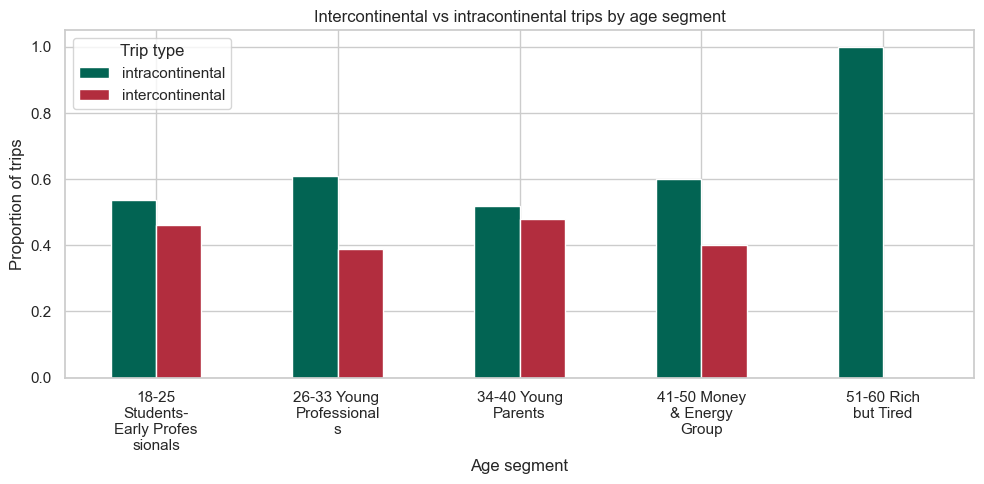

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

df = travel_trip_complete_christos_df

# contingency: rows = age segments, columns = inter/intra flag
ct = pd.crosstab(
    df["traveler_age_segment"],
    df["is_intercontinental_trip"]
)

# row-wise proportions
ct_prop = ct.div(ct.sum(axis=1), axis=0)

# rename columns for readability
ct_prop = ct_prop.rename(columns={False: "intracontinental", True: "intercontinental"})

ax = ct_prop.plot(
    kind="bar",
    stacked=False,
    figsize=(10,5),
    color=["#026453", "#b22d3e"]  # e.g. green intra, red inter
)

# wrap x labels
wrapped_labels = [
    "\n".join(textwrap.wrap(str(lbl), width=12))
    for lbl in ct_prop.index
]
ax.set_xticklabels(wrapped_labels, rotation=0, ha="center")

plt.xlabel("Age segment")
plt.ylabel("Proportion of trips")
plt.title("Intercontinental vs intracontinental trips by age segment")
plt.legend(title="Trip type")
plt.tight_layout()


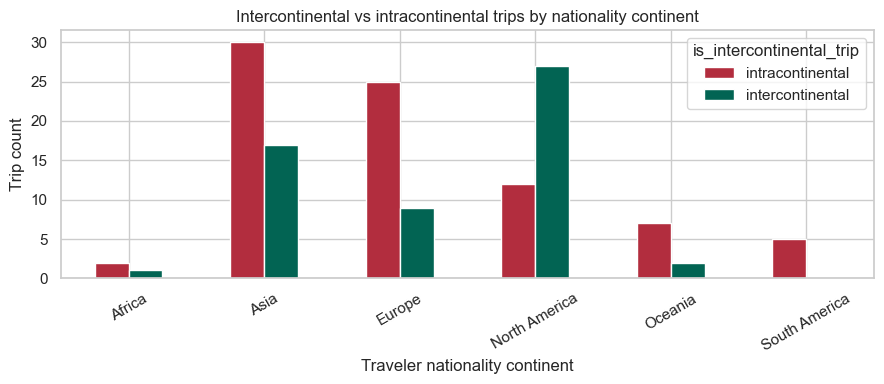

In [107]:
# intercontinental vs intracontinental trips per nationality continent
import pandas as pd
import matplotlib.pyplot as plt

ct = pd.crosstab(
    travel_trip_complete_christos_df["traveler_nationality_continent"],
    travel_trip_complete_christos_df["is_intercontinental_trip"]
)

# rename 0/1 for clarity
ct = ct.rename(columns={0: "intracontinental", 1: "intercontinental"})

ct.plot(kind="bar", stacked=False, figsize=(9,4))

plt.xlabel("Traveler nationality continent")
plt.ylabel("Trip count")
plt.title("Intercontinental vs intracontinental trips by nationality continent")
plt.xticks(rotation=30)
plt.tight_layout()




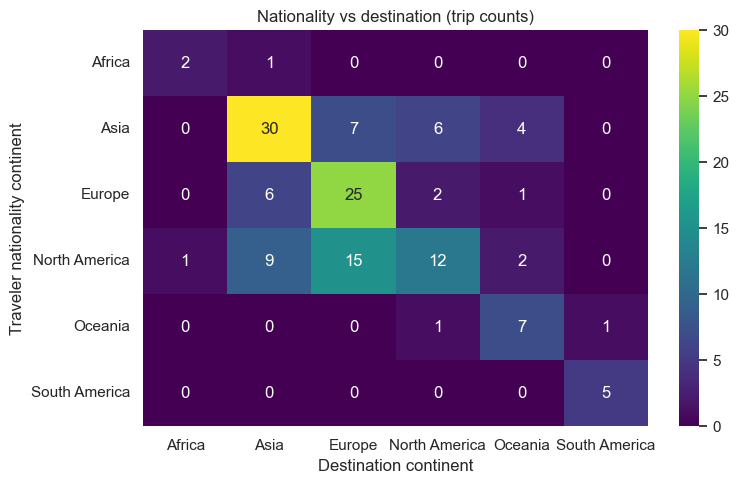

In [108]:
# 4. Nationality vs. Destination
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# contingency: nationality_continent x destination_continent
ct = pd.crosstab(
    travel_trip_complete_christos_df["traveler_nationality_continent"],
    travel_trip_complete_christos_df["destination_continent"]
)

plt.figure(figsize=(8,5))
sns.heatmap(ct, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Destination continent")
plt.ylabel("Traveler nationality continent")
plt.title("Nationality vs destination (trip counts)")
plt.tight_layout()


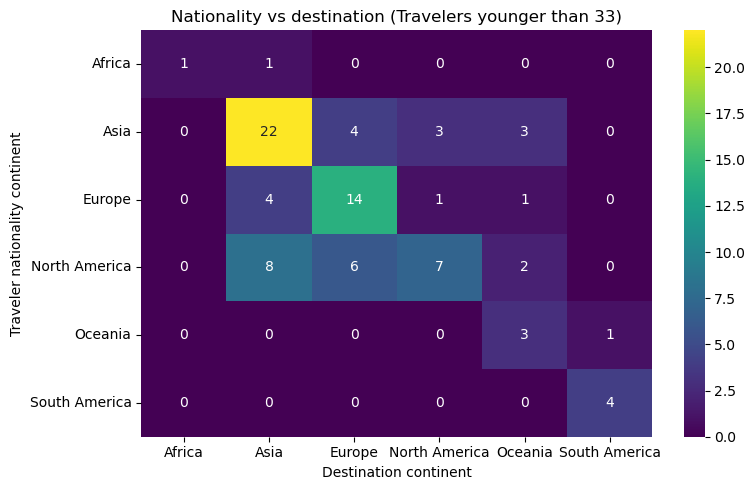

In [55]:
# and when looking only at the first two age clusters:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# filter the dataframe to the first two age clusters
age_mask = travel_trip_complete_christos_df["traveler_age_segment"].isin([
    "18-25 Students-Early Professionals",
    "26-33 Young Professionals",
])
df_sub = travel_trip_complete_christos_df[age_mask]

# nationality_continent x destination_continent counts
ct = pd.crosstab(
    df_sub["traveler_nationality_continent"],
    df_sub["destination_continent"]
)

plt.figure(figsize=(8,5))
sns.heatmap(ct, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Destination continent")
plt.ylabel("Traveler nationality continent")
plt.title("Nationality vs destination (Travelers younger than 33)")
plt.tight_layout()



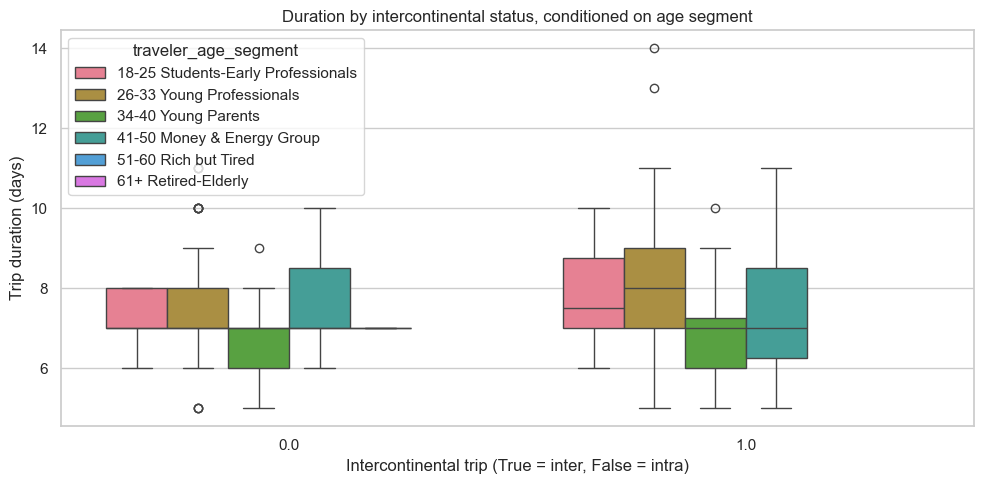

In [109]:
# testing duration's correlation to inter vs intra

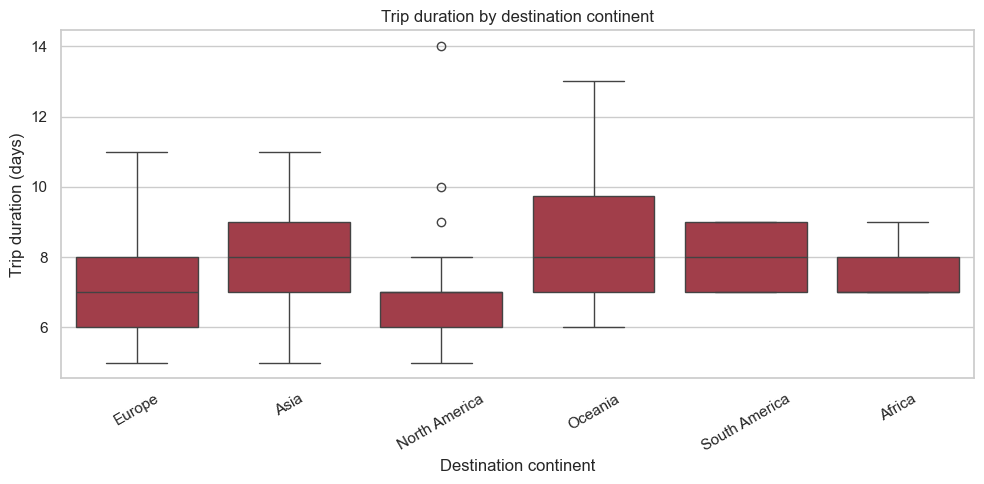

In [110]:
# and the same but this time per continent
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(
    data=travel_trip_complete_christos_df,
    x="destination_continent",
    y="duration_days"
)

plt.xlabel("Destination continent")
plt.ylabel("Trip duration (days)")
plt.title("Trip duration by destination continent")
plt.xticks(rotation=30)
plt.tight_layout()


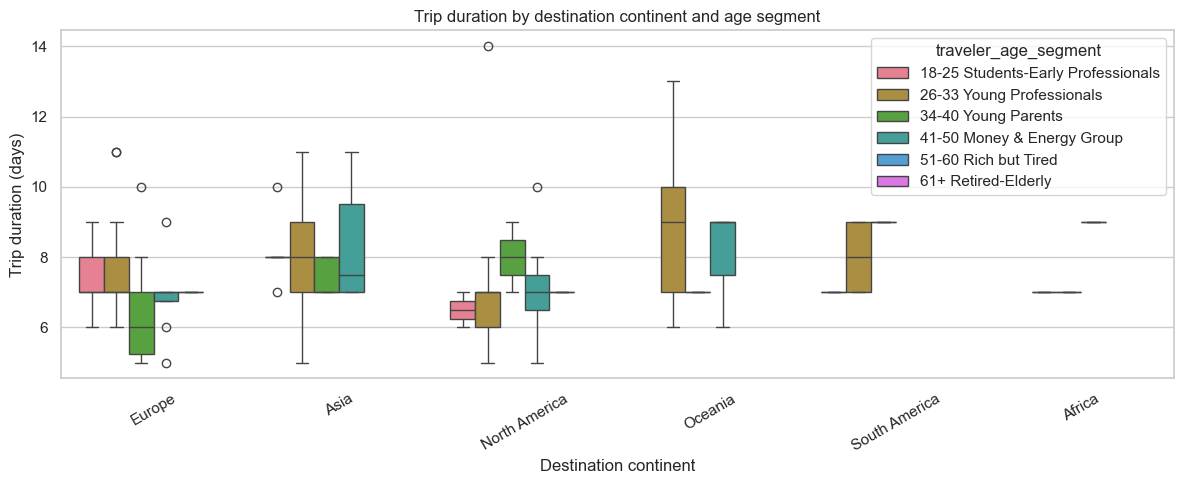

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.boxplot(
    data=travel_trip_complete_christos_df,
    x="destination_continent",
    y="duration_days",
    hue="traveler_age_segment"
)

plt.xlabel("Destination continent")
plt.ylabel("Trip duration (days)")
plt.title("Trip duration by destination continent and age segment")
plt.xticks(rotation=30)
plt.tight_layout()




### Hypothesis #3: Travelers choose different accommodation types for difrerent trip durations.

To do that we need to use series:
- duration_days
- accommodation_type

while controlling for destination.

Interpretation: longer stays might be associated with specific lodging patterns.


In [116]:
result = travel_trip_complete_christos_df.groupby("duration_days")["accommodation_type"].value_counts().unstack(fill_value=0)
print(result)

accommodation_type  Airbnb  Hostel  Hotel  Resort  Vacation rental  Villa
duration_days                                                            
5.0                      1       1      7       1                0      0
6.0                      3       1     10       0                1      1
7.0                     13       5     25       7                1      3
8.0                      4       7     10       3                0      0
9.0                      4       5      4       1                2      0
10.0                     4       3      2       1                0      0
11.0                     1       2      0       1                0      1
13.0                     0       0      1       0                0      0
14.0                     0       0      1       0                0      0


<Figure size 1200x700 with 0 Axes>

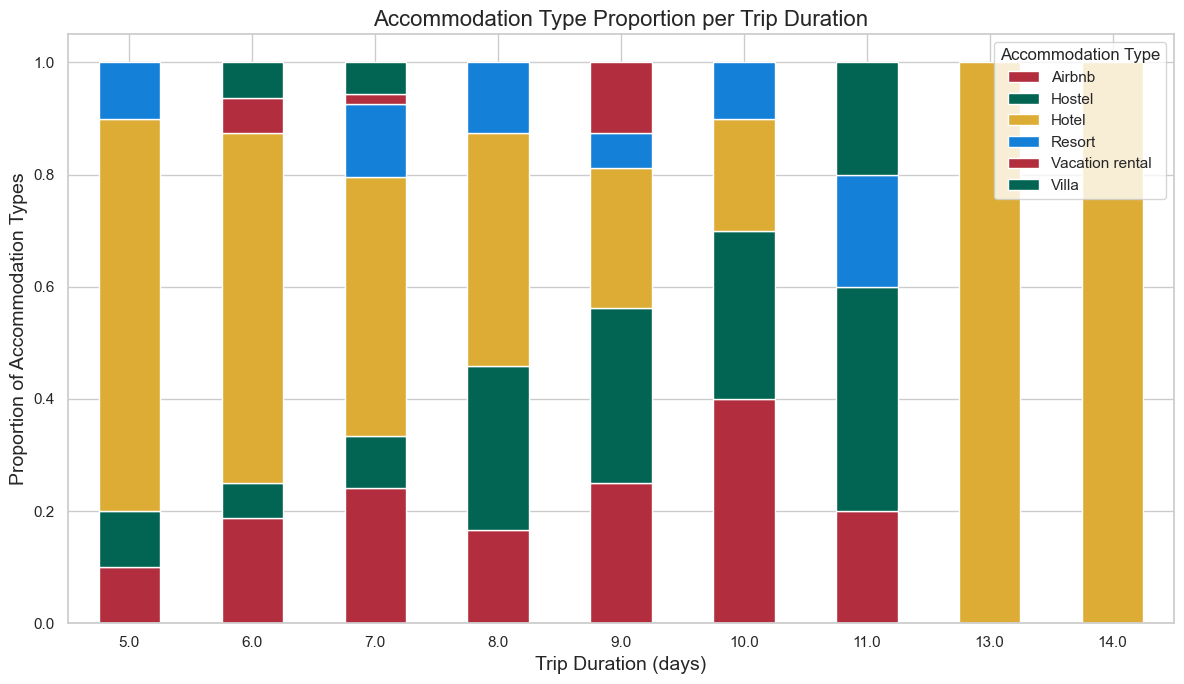

In [118]:
import matplotlib.pyplot as plt

# df_pivot: counts
# convert to proportions per trip duration (row-wise)
df_prop = df_pivot.div(df_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 7))

df_prop.plot(kind="bar", stacked=True, figsize=(12, 7))

plt.title("Accommodation Type Proportion per Trip Duration", fontsize=16)
plt.xlabel("Trip Duration (days)", fontsize=14)
plt.ylabel("Proportion of Accommodation Types", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Accommodation Type")
plt.tight_layout()
plt.show()


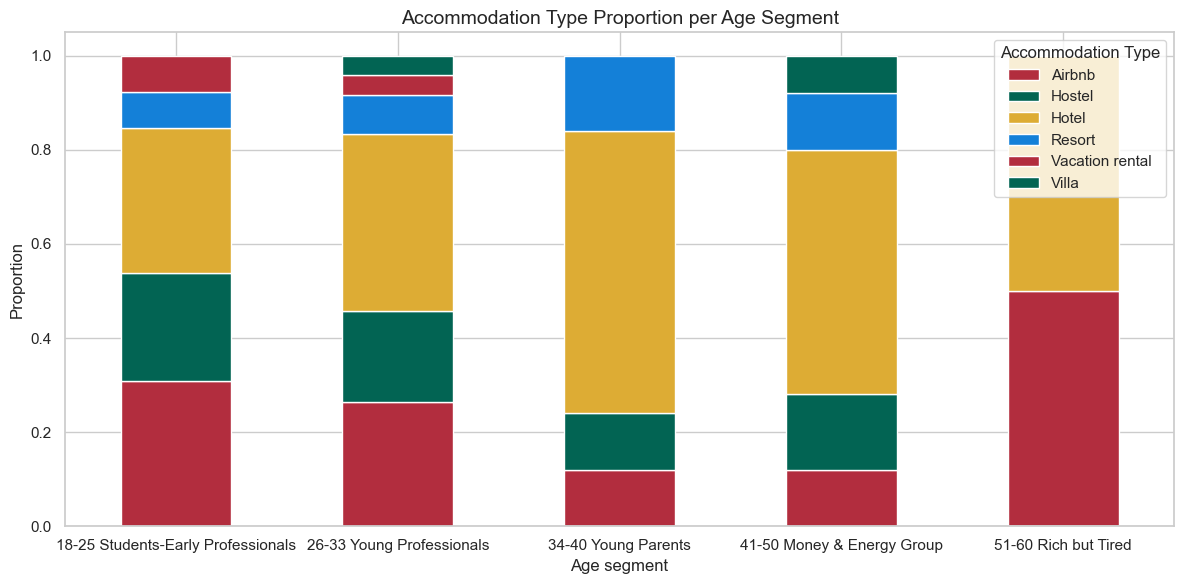

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# counts
ct = pd.crosstab(
    travel_trip_complete_christos_df["traveler_age_segment"],
    travel_trip_complete_christos_df["accommodation_type"]
)

# row-wise proportions
ct_prop = ct.div(ct.sum(axis=1), axis=0)

ct_prop.plot(kind="bar", stacked=True, figsize=(12,6))

plt.title("Accommodation Type Proportion per Age Segment", fontsize=14)
plt.xlabel("Age segment", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Accommodation Type")
plt.tight_layout()
plt.show()


### Hypothesis #4: Transportation type preferences differ by traveler age.

To do that, we need to use series:
- transportation_type
- traveler_age

Interpretation: age-targeted recommendations may be feasible.


In [121]:
travel_trip_complete_christos_df['traveler_age_segment'] = pd.cut(travel_trip_complete_christos_df['traveler_age'], bins=age_bins, labels=age_labels, right=True)

output = travel_trip_complete_christos_df[['traveler_age_segment', 'transportation_type']]

print(output)

                   traveler_age_segment transportation_type
0                   34-40 Young Parents              Flight
1             26-33 Young Professionals              Flight
2            41-50 Money & Energy Group              Flight
3             26-33 Young Professionals              Flight
4    18-25 Students-Early Professionals               Train
..                                  ...                 ...
132                 34-40 Young Parents         Private Car
133           26-33 Young Professionals            Airplane
134           26-33 Young Professionals               Train
135  18-25 Students-Early Professionals            Airplane
136                 34-40 Young Parents               Train

[137 rows x 2 columns]


In [122]:
transport_count = pd.crosstab(travel_trip_complete_christos_df['traveler_age_segment'], travel_trip_complete_christos_df['transportation_type'])
transport_count

transportation_type,Airplane,Bus,Ferry,Flight,Private Car,Rental Car,Subway,Train
traveler_age_segment,,,,,,,,
18-25 Students-Early Professionals,9,2,0,2,0,2,0,4
26-33 Young Professionals,29,3,1,6,1,9,1,18
34-40 Young Parents,13,1,0,2,1,0,0,11
41-50 Money & Energy Group,10,0,0,3,1,2,0,4
51-60 Rich but Tired,1,0,0,0,0,0,0,1


<Figure size 1200x700 with 0 Axes>

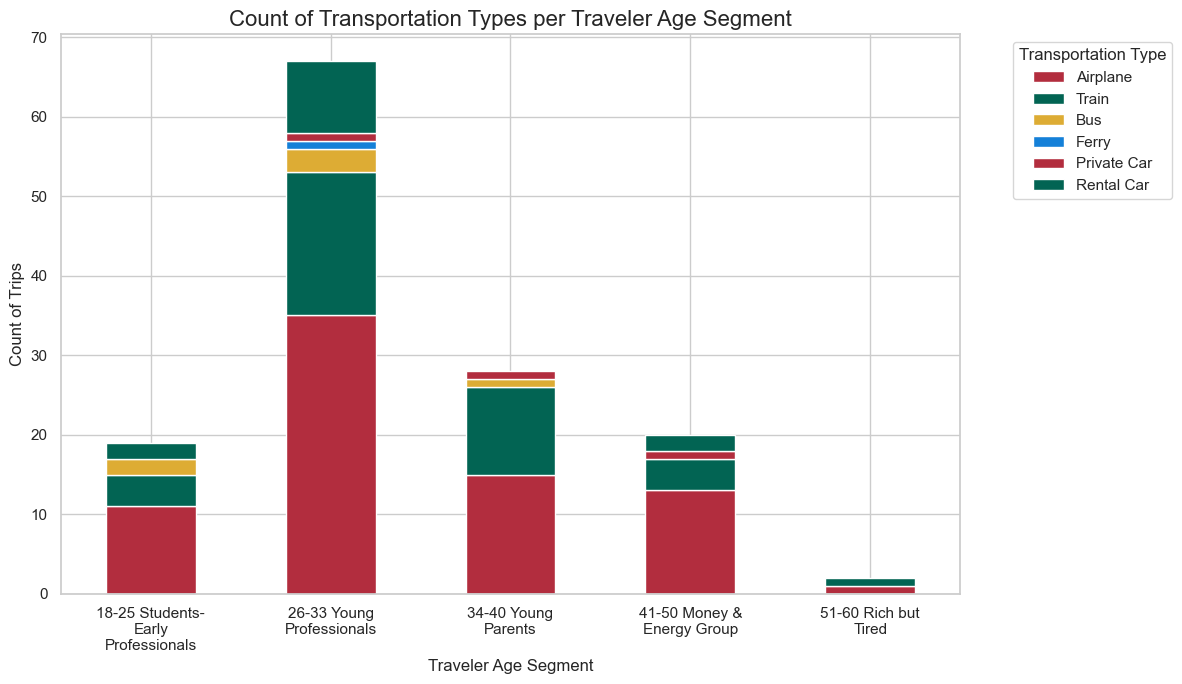

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

data = {
    'Airplane': [9, 29, 13, 10, 1],
    'Train': [4, 18, 11, 4, 1],
    'Bus': [2, 3, 1, 0, 0],
    'Flight': [2, 6, 2, 3, 0],
    'Ferry': [0, 1, 0, 0, 0],
    'Private Car': [0, 1, 1, 1, 0],
    'Rental Car': [2, 9, 0, 2, 0],
}

index = [
    "18-25 Students-Early Professionals",
    "26-33 Young Professionals",
    "34-40 Young Parents",
    "41-50 Money & Energy Group",
    "51-60 Rich but Tired"
]

# merge Flight into Airplane and drop Flight
data["Airplane"] = [a + f for a, f in zip(data["Airplane"], data["Flight"])]
del data["Flight"]

transport_df = pd.DataFrame(data, index=index)

brand_palette = ["#b22d3e", "#026453", "#ddac34", "#1480d8"]

plt.figure(figsize=(12, 7))
ax = transport_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=brand_palette   # cycles through these 4 for all bars
)

# wrap x-axis labels, horizontal
wrapped_labels = [
    "\n".join(textwrap.wrap(str(lbl), width=18))
    for lbl in transport_df.index
]
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')

plt.title("Count of Transportation Types per Traveler Age Segment", fontsize=16)
plt.xlabel("Traveler Age Segment", fontsize=12)
plt.ylabel("Count of Trips", fontsize=12)
plt.legend(title='Transportation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

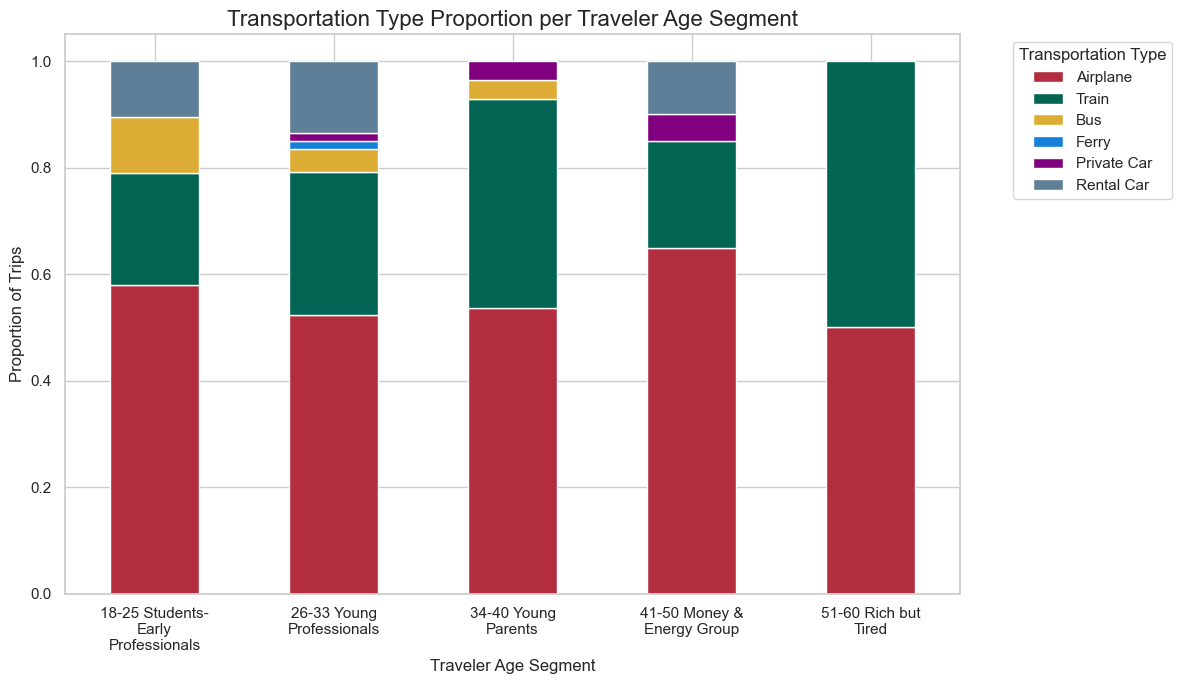

In [133]:
# but we rather use proportions
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

data = {
    'Airplane': [9, 29, 13, 10, 1],
    'Train': [4, 18, 11, 4, 1],
    'Bus': [2, 3, 1, 0, 0],
    'Flight': [2, 6, 2, 3, 0],
    'Ferry': [0, 1, 0, 0, 0],
    'Private Car': [0, 1, 1, 1, 0],
    'Rental Car': [2, 9, 0, 2, 0],
}

index = [
    "18-25 Students-Early Professionals",
    "26-33 Young Professionals",
    "34-40 Young Parents",
    "41-50 Money & Energy Group",
    "51-60 Rich but Tired"
]

# merge Flight into Airplane and drop Flight
data["Airplane"] = [a + f for a, f in zip(data["Airplane"], data["Flight"])]
del data["Flight"]

transport_df = pd.DataFrame(data, index=index)

# row-wise proportions
transport_prop = transport_df.div(transport_df.sum(axis=1), axis=0)

brand_palette = [
    "#b22d3e",  # Airplane
    "#026453",  # Train
    "#ddac34",  # Bus  (unchanged)
    "#1480d8",  # Ferry (unchanged)
    "#800080",  # Private Car (purple)
    "#5f7f99",  # Rental Car (grey-blue)
]

plt.figure(figsize=(12, 7))
ax = transport_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=brand_palette
)

# wrap x-axis labels, horizontal
wrapped_labels = [
    "\n".join(textwrap.wrap(str(lbl), width=18))
    for lbl in transport_prop.index
]
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')

plt.title("Transportation Type Proportion per Traveler Age Segment", fontsize=16)
plt.xlabel("Traveler Age Segment", fontsize=12)
plt.ylabel("Proportion of Trips", fontsize=12)
plt.legend(title='Transportation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Hypothesis #5: Accommodation and transportation prices in Europe follow seasonality patterns.

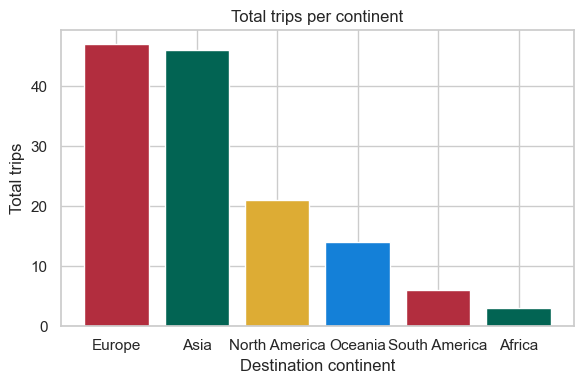

In [115]:
# total trips per destination continent
import pandas as pd
import matplotlib.pyplot as plt

df = travel_trip_complete_christos_df

totals = (
    df.groupby("destination_continent")
      .size()
      .reset_index(name="trip_count")
      .sort_values("trip_count", ascending=False)
)

plt.figure(figsize=(6,4))
plt.bar(
    totals["destination_continent"],
    totals["trip_count"],
    color=["#b22d3e", "#026453", "#ddac34", "#1480d8"]
)

plt.xlabel("Destination continent")
plt.ylabel("Total trips")
plt.title("Total trips per continent")
plt.tight_layout()


To do that we need:
- A curve showing us the seasonlity curve per one region/country/city
- Show how accommodation and transportation prices move according that that curve.

We will need to control for Europe, using:
- destination_continent == Yes

Interpretation: pricing could be aligned with observable demand cycles. Therefore, we can propose good travel deals to price conscious travelers, outside the season.


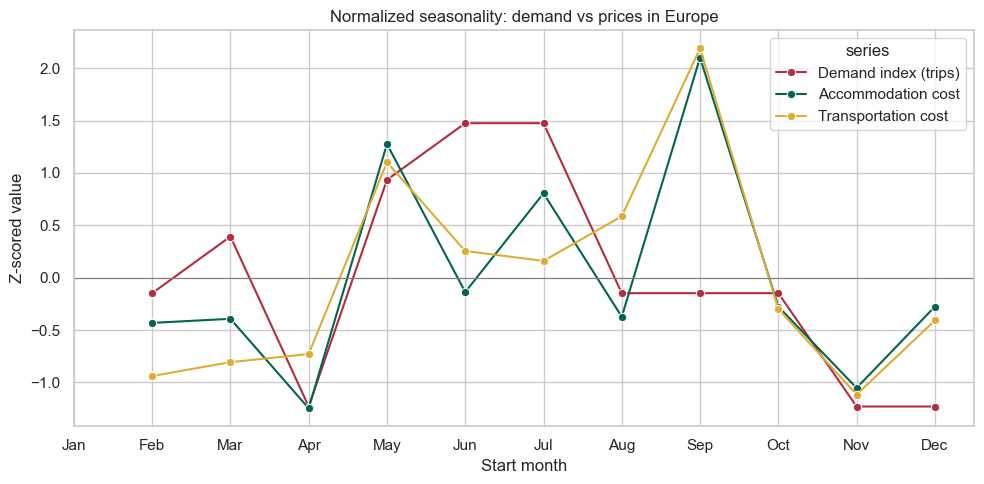

In [112]:
# firstly, we will produce a normalized line chart:
# x: month
# y: three z-scored series:
# --seasonal demand index
# --mean accommodation price
# -- mean transportation price

# remember, we will only work for trips in Europe, to keep it clean.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# 1. keep only trips to Europe
df_eu = df[df["destination_continent"] == "Europe"].copy()

# 2. monthly aggregates for Europe
monthly_eu = (
    df_eu
    .groupby("start_month")
    .agg(
        demand=("start_month", "size"),
        mean_accommodation_cost=("accommodation_cost", "mean"),
        mean_transportation_cost=("transportation_cost", "mean"),
    )
    .reset_index()
)

# 3. z-score normalization per series, to rescale each series so they share a common scale and center, which makes their shapes directly comparable
for col in ["demand", "mean_accommodation_cost", "mean_transportation_cost"]:
    monthly_eu[col + "_z"] = (monthly_eu[col] - monthly_eu[col].mean()) / monthly_eu[col].std()

# 4. reshape for plotting
plot_df = monthly_eu.melt(
    id_vars="start_month",
    value_vars=["demand_z", "mean_accommodation_cost_z", "mean_transportation_cost_z"],
    var_name="series",
    value_name="z_value",
)

label_map = {
    "demand_z": "Demand index (trips)",
    "mean_accommodation_cost_z": "Accommodation cost",
    "mean_transportation_cost_z": "Transportation cost",
}
plot_df["series"] = plot_df["series"].map(label_map)

# 5. line chart
plt.figure(figsize=(10,5))
sns.lineplot(
    data=plot_df.sort_values("start_month"),
    x="start_month",
    y="z_value",
    hue="series",
    marker="o",
)

plt.xticks(
    ticks=range(1, 13),
    labels=calendar.month_abbr[1:13]
)
plt.xlabel("Start month")
plt.ylabel("Z-scored value")
plt.title("Normalized seasonality: demand vs prices in Europe")
plt.axhline(0, color="grey", linewidth=0.8)
plt.tight_layout()

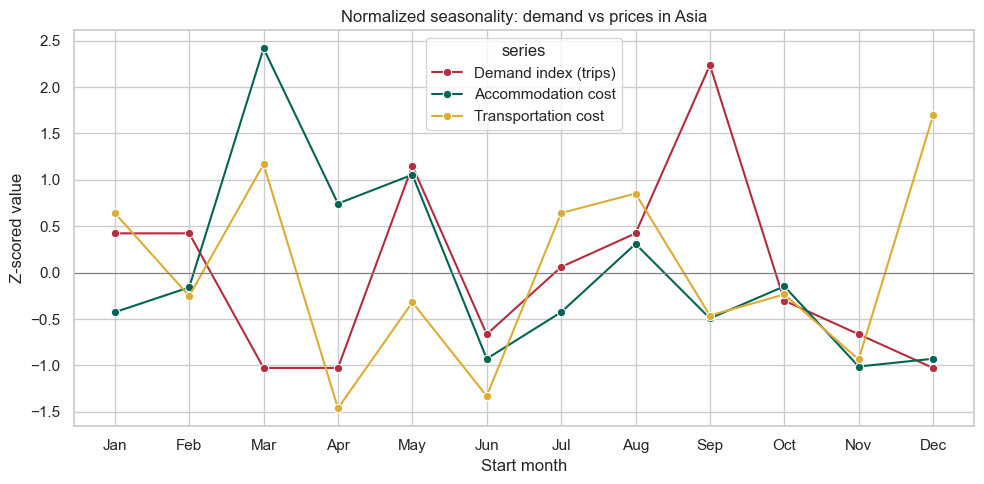

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# 1. keep only trips to Europe
df_eu = df[df["destination_continent"] == "Asia"].copy()

# 2. monthly aggregates for Europe
monthly_eu = (
    df_eu
    .groupby("start_month")
    .agg(
        demand=("start_month", "size"),
        mean_accommodation_cost=("accommodation_cost", "mean"),
        mean_transportation_cost=("transportation_cost", "mean"),
    )
    .reset_index()
)

# 3. z-score normalization per series, to rescale each series so they share a common scale and center, which makes their shapes directly comparable
for col in ["demand", "mean_accommodation_cost", "mean_transportation_cost"]:
    monthly_eu[col + "_z"] = (monthly_eu[col] - monthly_eu[col].mean()) / monthly_eu[col].std()

# 4. reshape for plotting
plot_df = monthly_eu.melt(
    id_vars="start_month",
    value_vars=["demand_z", "mean_accommodation_cost_z", "mean_transportation_cost_z"],
    var_name="series",
    value_name="z_value",
)

label_map = {
    "demand_z": "Demand index (trips)",
    "mean_accommodation_cost_z": "Accommodation cost",
    "mean_transportation_cost_z": "Transportation cost",
}
plot_df["series"] = plot_df["series"].map(label_map)

# 5. line chart
plt.figure(figsize=(10,5))
sns.lineplot(
    data=plot_df.sort_values("start_month"),
    x="start_month",
    y="z_value",
    hue="series",
    marker="o",
)

plt.xticks(
    ticks=range(1, 13),
    labels=calendar.month_abbr[1:13]
)
plt.xlabel("Start month")
plt.ylabel("Z-scored value")
plt.title("Normalized seasonality: demand vs prices in Asia")
plt.axhline(0, color="grey", linewidth=0.8)
plt.tight_layout()

In [62]:
# we also want to build a correlation table to seewhether the three European month-level series co-move
# assume monthly_eu already exists as in the previous code
# (with columns: demand, mean_accommodation_price, mean_transportation_price)

corr = monthly_eu[[
    "demand",
    "mean_accommodation_cost",
    "mean_transportation_cost"
]].corr(method="pearson")

corr


,demand,mean_accommodation_cost,mean_transportation_cost
demand,1.000000,0.503655,0.386629
mean_accommodation_cost,0.503655,1.000000,0.887682
mean_transportation_cost,0.386629,0.887682,1.000000


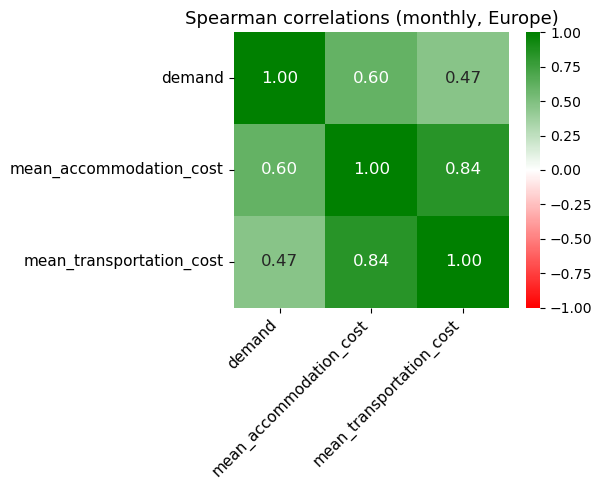

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap

# Spearman correlations
corr_s = monthly_eu[[
    "demand",
    "mean_accommodation_cost",
    "mean_transportation_cost"
]].corr(method="spearman")

# red (-1) -> white (0) -> green (1)
cmap = LinearSegmentedColormap.from_list(
    "red_white_green",
    ["red", "white", "green"]
)

norm = TwoSlopeNorm(vmin=-1, vcenter=0.0, vmax=1)

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_s,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    norm=norm,
    square=False,
    cbar=True,
    annot_kws={"size": 12}
)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.title("Spearman correlations (monthly, Europe)", fontsize=13)
plt.tight_layout()



# Extra Analysis

In [135]:
import pandas as pd

df = travel_trip_complete_christos_df

top10_cities = (
    df.groupby("destination_city")
      .size()
      .reset_index(name="trip_count")
      .sort_values("trip_count", ascending=False)
      .head(10)
)

top10_cities


,destination_city,trip_count
27,Paris,14
37,Tokyo,12
4,Bali,12
35,Sydney,12
31,Rome,9
5,Bangkok,8
25,New York,8
21,London,7
6,Barcelona,6
30,Rio de Janeiro,5


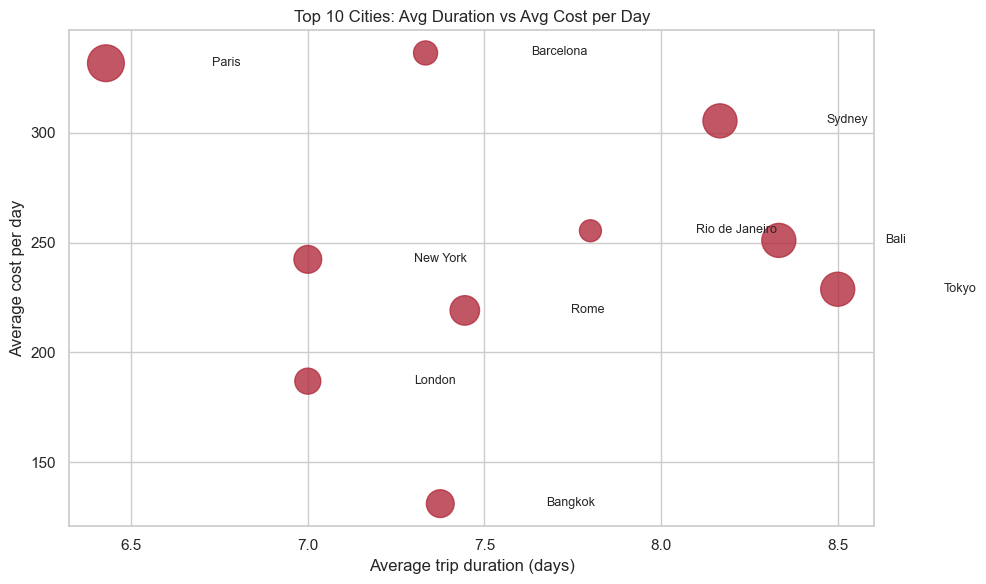

In [139]:
# now for these cities I would like to see a scatter plot showing the correlation between average trip duration and average cost per day, where average cost per day = (accommodation cost + transportation cost) divided by trip duration.
import pandas as pd
import matplotlib.pyplot as plt

df = travel_trip_complete_christos_df.copy()

# average cost per day
df["avg_cost_per_day"] = (
    (df["accommodation_cost"] + df["transportation_cost"]) / df["duration_days"]
)

# top 10 cities
top10 = (
    df.groupby("destination_city")
      .size()
      .sort_values(ascending=False)
      .head(10)
      .index
)

df_top10 = df[df["destination_city"].isin(top10)]

# aggregates
city_stats = (
    df_top10.groupby("destination_city")
            .agg(
                mean_duration=("duration_days", "mean"),
                mean_cost_per_day=("avg_cost_per_day", "mean"),
                trip_count=("duration_days", "size")
            )
            .reset_index()
)

city_stats["bubble_size"] = city_stats["trip_count"] * 50

plt.figure(figsize=(10,6))

plt.scatter(
    city_stats["mean_duration"],
    city_stats["mean_cost_per_day"],
    s=city_stats["bubble_size"],
    color="#b22d3e",
    alpha=0.8
)

# label offset (tune these if needed)
x_offset = 0.3
y_offset = 0.3

for _, row in city_stats.iterrows():
    plt.text(
        row["mean_duration"] + x_offset,
        row["mean_cost_per_day"] + y_offset,
        row["destination_city"],
        fontsize=9,
        ha="left",
        va="center"
    )

plt.xlabel("Average trip duration (days)")
plt.ylabel("Average cost per day")
plt.title("Top 10 Cities: Avg Duration vs Avg Cost per Day")
plt.tight_layout()




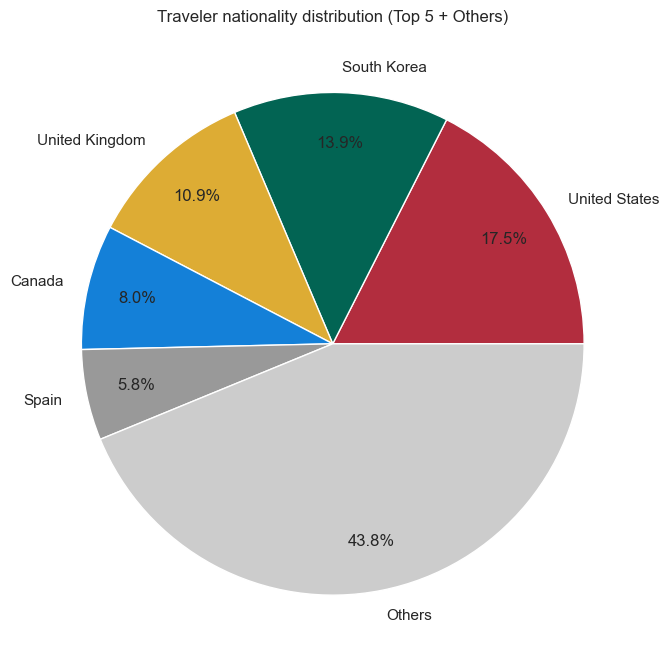

In [146]:
# top traveling nationalities in trip count.
import pandas as pd
import matplotlib.pyplot as plt

df = travel_trip_complete_christos_df

# --- compute top 5 ---
nat_counts = (
    df.groupby("traveler_nationality_clean")
      .size()
      .sort_values(ascending=False)
)

top5 = nat_counts.head(5)
others = nat_counts.iloc[5:].sum()

# combined series
pie_series = pd.concat([top5, pd.Series({"Others": others})])

# --- plot ---
plt.figure(figsize=(7,7))

plt.pie(
    pie_series,
    labels=pie_series.index,
    autopct='%1.1f%%',          # percentage values
    pctdistance=0.8,            # move percentages slightly outward
    labeldistance=1.1,          # move labels outside the pie
    colors=["#b22d3e","#026453","#ddac34","#1480d8","#999999","#CCCCCC"][:len(pie_series)]
)

plt.title("Traveler nationality distribution (Top 5 + Others)")
plt.tight_layout()
plt.show()




<Figure size 1200x600 with 0 Axes>

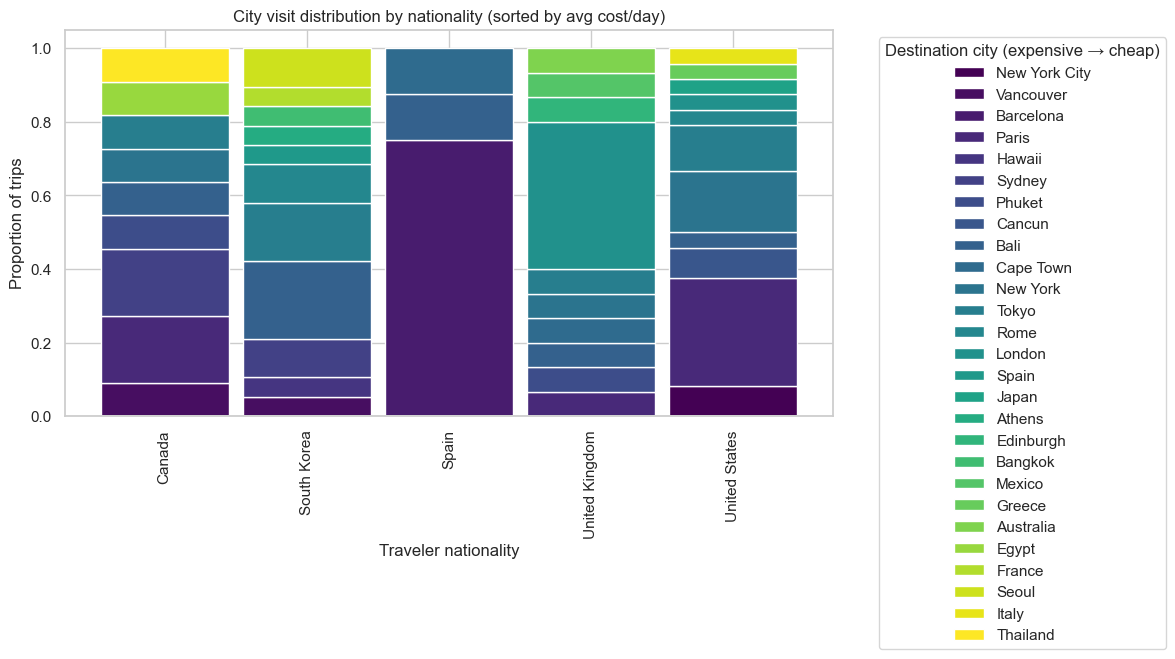

In [149]:
# I want a bar plot, proportion style, with x axis the top 5 traveler_nationalities, and values the percentage of different cities they have visited, in order from most expensive (average cost per day) to least expensive
df = travel_trip_complete_christos_df.copy()

df["avg_cost_per_day"] = (
    (df["accommodation_cost"] + df["transportation_cost"]) / df["duration_days"]
)

top5_nats = (
    df.groupby("traveler_nationality_clean")
      .size()
      .sort_values(ascending=False)
      .head(5)
      .index
)

df_top5 = df[df["traveler_nationality_clean"].isin(top5_nats)]

city_costs = (
    df.groupby("destination_city")["avg_cost_per_day"]
      .mean()
      .sort_values(ascending=False)
)

# expensive → cheap order
city_order = city_costs.index.tolist()

ct = pd.crosstab(
    df_top5["traveler_nationality_clean"],
    df_top5["destination_city"]
)
ct_prop = ct.div(ct.sum(axis=1), axis=0)

# keep only cities that appear in ct_prop, but ordered by global cost rank
filtered_city_order = [c for c in city_order if c in ct_prop.columns]

ct_prop = ct_prop[filtered_city_order]

# brand colours
brand_palette = ["#b22d3e", "#026453", "#ddac34", "#1480d8"]

sns.set_theme(style="whitegrid")  # or other style
sns.set_palette(brand_palette)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=brand_palette)


import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

ct_prop.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    width=0.9,
    colormap="viridis"  # or your brand colors if mapping manually
)

plt.xlabel("Traveler nationality")
plt.ylabel("Proportion of trips")
plt.title("City visit distribution by nationality (sorted by avg cost/day)")

plt.legend(
    title="Destination city (expensive → cheap)",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


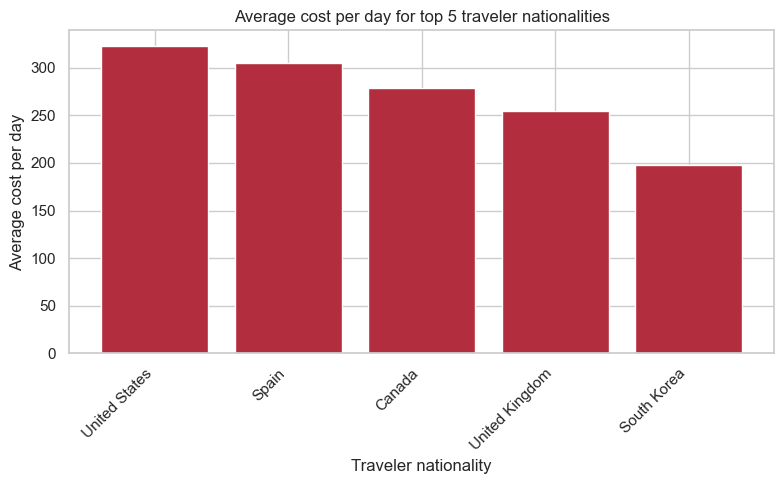

In [151]:
# ok now let's see average cost per day, for top 5 nationalities
df = travel_trip_complete_christos_df.copy()

df["avg_cost_per_day"] = (
    (df["accommodation_cost"] + df["transportation_cost"]) / df["duration_days"]
)

top5_nats = (
    df.groupby("traveler_nationality_clean")
      .size()
      .sort_values(ascending=False)
      .head(5)
      .index
)

df_top5 = df[df["traveler_nationality_clean"].isin(top5_nats)]

nat_costs = (
    df_top5.groupby("traveler_nationality_clean")["avg_cost_per_day"]
           .mean()
           .sort_values(ascending=False)
)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.bar(
    nat_costs.index,
    nat_costs.values,
    color="#b22d3e"    # brand orange for emphasis
)

plt.xlabel("Traveler nationality")
plt.ylabel("Average cost per day")
plt.title("Average cost per day for top 5 traveler nationalities")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
